In [31]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import thinkstats2
from statsmodels.stats.power import TTestPower

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

# Covid Death Rates in Murica

In [32]:
df = pd.read_csv("data/covid_deaths.csv")
df.tail()

,Entity,Code,Day,unvaccinated,fully_vaccinated,one_booster,two_boosters
64,65+,NaN,2022-08-06,19.234823,3.910625,4.089089,1.474249
65,65+,NaN,2022-08-13,18.368447,2.886041,3.631969,1.291351
66,65+,NaN,2022-08-20,15.428465,2.710362,3.349248,1.254070
67,65+,NaN,2022-08-27,12.913809,1.964277,2.570634,1.017843
68,65+,NaN,2022-09-03,10.702155,2.020642,2.602872,1.041678


<AxesSubplot:xlabel='Day', ylabel='unvaccinated'>

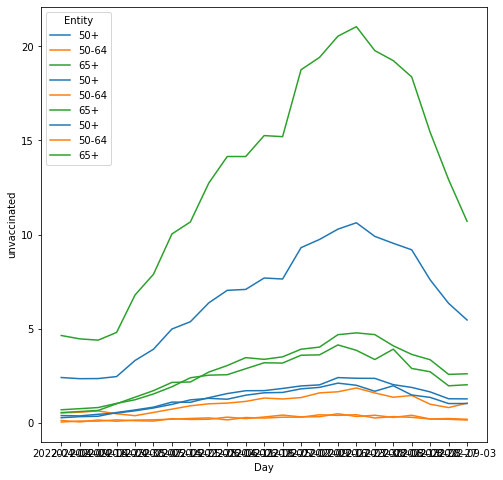

In [33]:
sns.lineplot(data=df, x="Day", y="unvaccinated", hue="Entity")
sns.lineplot(data=df, x="Day", y="fully_vaccinated", hue="Entity")
sns.lineplot(data=df, x="Day", y="one_booster", hue="Entity")

### Is there a significant difference in death rates between Fully Vaccinated people and Unvaccinated people?

#### Create Datasets

In [34]:
fv = df["fully_vaccinated"]
un = df["unvaccinated"]

#### Explore Datasets

<AxesSubplot:xlabel='fully_vaccinated', ylabel='Density'>

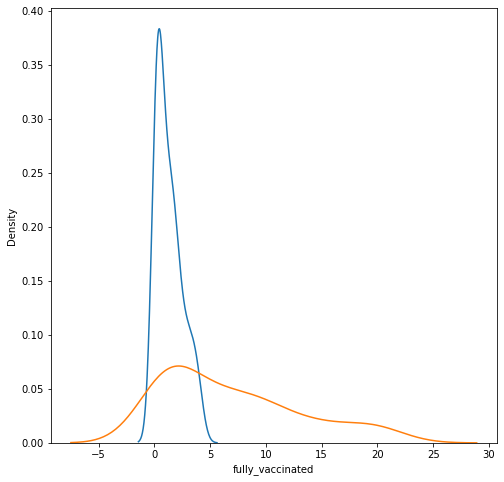

In [35]:
sns.kdeplot(fv)
sns.kdeplot(un)

In [36]:
fv.describe()

count    69.000000
mean      1.318059
std       1.148704
min       0.044441
25%       0.297390
50%       1.025216
75%       1.966681
max       4.136138
Name: fully_vaccinated, dtype: float64

In [37]:
un.describe()

count    69.000000
mean      6.903453
std       6.116893
min       0.377413
25%       1.357448
50%       5.367513
75%      10.284717
max      21.037893
Name: unvaccinated, dtype: float64

### Hypothesis Test

First I'll try a regular t-test, then I'll do the non-parametric version, the Mann-Whitney. 

In [38]:
# t-test
ss.ttest_ind(fv, un)

Ttest_indResult(statistic=-7.454552636718715, pvalue=9.50701441183468e-12)

In [39]:
# mw
ss.mannwhitneyu(fv, un)

MannwhitneyuResult(statistic=845.0, pvalue=6.299258240567537e-11)

### Calculate Power

In [40]:
# Calculate inputs
ces = thinkstats2.CohenEffectSize(un, fv)
alpha = .05
nobs = fv.count() + un.count()

In [41]:
# calculate power
powerTest = TTestPower()
pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, 1.2691473231783308)

### Result

Looks like a statistically significant difference, by every metric. 

### Is There a Significant Difference in Death Rates Between Fully Vaccinated and Boosted Populations*

*The boosted population has two groups - those with one booster and those with two. The one booster group is larger than the two booster group - there are more people with only one booster than there are with two. Use the below ratio to generate a weighted average rate. I.e. if the ratio is .2, that means that 20% of the total boosted population has two doses and 80% have one dose. 

In [ ]:
two_dose_ratio = .2